## Flight Delay Prediction Challenge

### EDA Departure point and arrival point

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#loaded data as well as airport data with information about the airports from https://datahub.io/core/airport-codes 

df = pd.read_csv('data/Train.csv')
airport_data = pd.read_csv('data/airport_data.csv', dtype={'continent': 'string'}, na_values=[''])
airport_data['continent'].fillna('NA', inplace=True)
df.columns = df.columns.str.lower()

In [3]:
airport_data.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,icao_code,iata_code,gps_code,local_code,coordinates
0,00A,heliport,Total RF Heliport,11.0,NA,US,US-PA,Bensalem,NaN,NaN,K00A,00A,"40.070985, -74.933689"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NA,US,US-KS,Leoti,NaN,NaN,00AA,00AA,"38.704022, -101.473911"
2,00AK,small_airport,Lowell Field,450.0,NA,US,US-AK,Anchor Point,NaN,NaN,00AK,00AK,"59.947733, -151.692524"
3,00AL,small_airport,Epps Airpark,820.0,NA,US,US-AL,Harvest,NaN,NaN,00AL,00AL,"34.86479949951172, -86.77030181884766"
4,00AN,small_airport,Katmai Lodge Airport,80.0,NA,US,US-AK,King Salmon,NaN,NaN,00AN,00AN,"59.093287, -156.456699"


In [4]:
# Provided airport information
airport_info = [
    {'iata_code': 'AMM', 'continent': 'AS', 'iso_country': 'JO', 'type': 'large_airport'},
    {'iata_code': 'BEY', 'continent': 'AS', 'iso_country': 'LB', 'type': 'large_airport'},
    {'iata_code': 'DOH', 'continent': 'AS', 'iso_country': 'QA', 'type': 'large_airport'},
    {'iata_code': 'EBL', 'continent': 'AS', 'iso_country': 'IQ', 'type': 'large_airport'},
    {'iata_code': 'IEV', 'continent': 'EU', 'iso_country': 'UA', 'type': 'medium_airport'},
    {'iata_code': 'JED', 'continent': 'AS', 'iso_country': 'SA', 'type': 'large_airport'},
    {'iata_code': 'KBP', 'continent': 'EU', 'iso_country': 'UA', 'type': 'large_airport'},
    {'iata_code': 'KRR', 'continent': 'EU', 'iso_country': 'RU', 'type': 'large_airport'},
    {'iata_code': 'LED', 'continent': 'EU', 'iso_country': 'RU', 'type': 'large_airport'},
    {'iata_code': 'MED', 'continent': 'AS', 'iso_country': 'SA', 'type': 'medium_airport'},
    {'iata_code': 'SKX', 'continent': 'EU', 'iso_country': 'RU', 'type': 'small_airport'},
    {'iata_code': 'SVO', 'continent': 'EU', 'iso_country': 'RU', 'type': 'large_airport'},
    {'iata_code': 'SXF', 'continent': 'EU', 'iso_country': 'DE', 'type': 'large_airport'},
    {'iata_code': 'VKO', 'continent': 'EU', 'iso_country': 'RU', 'type': 'large_airport'},
    {'iata_code': 'VOG', 'continent': 'EU', 'iso_country': 'RU', 'type': 'medium_airport'}
]

# Convert airport_info to DataFrame
new_info_df = pd.DataFrame(airport_info)

# Update existing rows or append new rows
for index, row in new_info_df.iterrows():
    iata_code = row['iata_code']
    if iata_code in airport_data['iata_code'].values:
        airport_data.loc[airport_data['iata_code'] == iata_code, ['continent', 'iso_country', 'type']] = row[['continent', 'iso_country', 'type']]
    else:
        airport_data = pd.concat([airport_data, row.to_frame().T], ignore_index=True)

airport_data.head(20)


,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,icao_code,iata_code,gps_code,local_code,coordinates
0,00A,heliport,Total RF Heliport,11.0,NA,US,US-PA,Bensalem,NaN,NaN,K00A,00A,"40.070985, -74.933689"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NA,US,US-KS,Leoti,NaN,NaN,00AA,00AA,"38.704022, -101.473911"
2,00AK,small_airport,Lowell Field,450.0,NA,US,US-AK,Anchor Point,NaN,NaN,00AK,00AK,"59.947733, -151.692524"
3,00AL,small_airport,Epps Airpark,820.0,NA,US,US-AL,Harvest,NaN,NaN,00AL,00AL,"34.86479949951172, -86.77030181884766"
4,00AN,small_airport,Katmai Lodge Airport,80.0,NA,US,US-AK,King Salmon,NaN,NaN,00AN,00AN,"59.093287, -156.456699"
5,00AS,small_airport,Fulton Airport,1100.0,NA,US,US-OK,Alex,NaN,NaN,00AS,00AS,"34.9428028, -97.8180194"
6,00AZ,small_airport,Cordes Airport,3810.0,NA,US,US-AZ,Cordes,NaN,NaN,00AZ,00AZ,"34.305599212646484, -112.16500091552734"
7,00CA,small_airport,Goldstone (GTS) Airport,3038.0,NA,US,US-CA,Barstow,NaN,NaN,00CA,00CA,"35.35474, -116.885329"
8,00CL,small_airport,Williams Ag Airport,87.0,NA,US,US-CA,Biggs,NaN,NaN,00CL,00CL,"39.427188, -121.763427"
9,00CN,heliport,Kitchen Creek Helibase Heliport,3350.0,NA,US,US-CA,Pine Valley,NaN,NaN,00CN,00CN,"32.7273736, -116.4597417"


In [5]:
airport_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48709 entries, 0 to 48708
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ident         48694 non-null  object 
 1   type          48709 non-null  object 
 2   name          48694 non-null  object 
 3   elevation_ft  39735 non-null  float64
 4   continent     48709 non-null  object 
 5   iso_country   48449 non-null  object 
 6   iso_region    48694 non-null  object 
 7   municipality  46292 non-null  object 
 8   icao_code     4361 non-null   object 
 9   iata_code     5233 non-null   object 
 10  gps_code      26515 non-null  object 
 11  local_code    25138 non-null  object 
 12  coordinates   48693 non-null  object 
dtypes: float64(1), object(12)
memory usage: 4.8+ MB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      107833 non-null  object 
 1   datop   107833 non-null  object 
 2   fltid   107833 non-null  object 
 3   depstn  107833 non-null  object 
 4   arrstn  107833 non-null  object 
 5   std     107833 non-null  object 
 6   sta     107833 non-null  object 
 7   status  107833 non-null  object 
 8   ac      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [7]:
airport_data.head(20)

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,icao_code,iata_code,gps_code,local_code,coordinates
0,00A,heliport,Total RF Heliport,11.0,NA,US,US-PA,Bensalem,NaN,NaN,K00A,00A,"40.070985, -74.933689"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NA,US,US-KS,Leoti,NaN,NaN,00AA,00AA,"38.704022, -101.473911"
2,00AK,small_airport,Lowell Field,450.0,NA,US,US-AK,Anchor Point,NaN,NaN,00AK,00AK,"59.947733, -151.692524"
3,00AL,small_airport,Epps Airpark,820.0,NA,US,US-AL,Harvest,NaN,NaN,00AL,00AL,"34.86479949951172, -86.77030181884766"
4,00AN,small_airport,Katmai Lodge Airport,80.0,NA,US,US-AK,King Salmon,NaN,NaN,00AN,00AN,"59.093287, -156.456699"
5,00AS,small_airport,Fulton Airport,1100.0,NA,US,US-OK,Alex,NaN,NaN,00AS,00AS,"34.9428028, -97.8180194"
6,00AZ,small_airport,Cordes Airport,3810.0,NA,US,US-AZ,Cordes,NaN,NaN,00AZ,00AZ,"34.305599212646484, -112.16500091552734"
7,00CA,small_airport,Goldstone (GTS) Airport,3038.0,NA,US,US-CA,Barstow,NaN,NaN,00CA,00CA,"35.35474, -116.885329"
8,00CL,small_airport,Williams Ag Airport,87.0,NA,US,US-CA,Biggs,NaN,NaN,00CL,00CL,"39.427188, -121.763427"
9,00CN,heliport,Kitchen Creek Helibase Heliport,3350.0,NA,US,US-CA,Pine Valley,NaN,NaN,00CN,00CN,"32.7273736, -116.4597417"


In [8]:
#select interesting columns from airport_data
airport_data = airport_data[['continent', 'iso_country', 'elevation_ft', 'type', 'iata_code']]

In [9]:
#merge airport data with train data
df = df.merge(airport_data, left_on='depstn', right_on='iata_code', how='left')
df = df.merge(airport_data, left_on='arrstn', right_on='iata_code', how='left', suffixes=('_dep', '_arr'))
df = df.drop(columns=['iata_code_dep', 'iata_code_arr'])
df.head()

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target,continent_dep,iso_country_dep,elevation_ft_dep,type_dep,continent_arr,iso_country_arr,elevation_ft_arr,type_arr
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,AF,MA,656.0,large_airport,AF,TN,22.0,large_airport
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,EU,IT,768.0,large_airport,AF,TN,22.0,large_airport
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,AF,TN,22.0,large_airport,EU,TR,325.0,large_airport
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,AF,TN,19.0,medium_airport,EU,FR,90.0,medium_airport
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,AF,TN,22.0,large_airport,AF,DZ,82.0,large_airport


In [10]:
yul_df = df[df['depstn'] == 'YUL']
yul_df[['depstn', 'continent_dep']].head()


,depstn,continent_dep
2850,YUL,NA
3033,YUL,NA
3239,YUL,NA
3950,YUL,NA
5145,YUL,NA


In [11]:
import numpy as np

# Make new features with DP Kontinent = Arr Kontinent
df['is_same_continent'] = np.where(df['continent_dep'].isna() | df['continent_arr'].isna(), np.nan, df['continent_dep'] == df['continent_arr'])
df['is_same_country'] = np.where(df['iso_country_dep'].isna() | df['iso_country_arr'].isna(), np.nan, df['iso_country_dep'] == df['iso_country_arr'])

In [12]:
df.head()

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target,continent_dep,iso_country_dep,elevation_ft_dep,type_dep,continent_arr,iso_country_arr,elevation_ft_arr,type_arr,is_same_continent,is_same_country
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,AF,MA,656.0,large_airport,AF,TN,22.0,large_airport,1.0,0.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,EU,IT,768.0,large_airport,AF,TN,22.0,large_airport,0.0,0.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,AF,TN,22.0,large_airport,EU,TR,325.0,large_airport,0.0,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,AF,TN,19.0,medium_airport,EU,FR,90.0,medium_airport,0.0,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,AF,TN,22.0,large_airport,AF,DZ,82.0,large_airport,1.0,0.0


In [13]:
#delete columns (EDA Eva)
df = df[~df['status'].isin(['DEL', 'SCH', 'RTR', 'DEP'])]

In [14]:
# Extract time from scheduled time departure (std) and confert to datetime
df['std'] = pd.to_datetime(df['std']).dt.strftime('%H:%M:%S')

# Extract time from scheduled time arrival (sta) and convert to datetime
df['sta'] = pd.to_datetime(df['sta'], format='%Y-%m-%d %H.%M.%S').dt.strftime('%H:%M:%S')

In [15]:
#Extract morning, midday, afternoon, evening, night from scheduled time departure (std) and scheduled time arrival (sta)
def get_time_of_day(time_str):
    hour = int(time_str.split(':')[0])
    if 0 <= hour < 6:
        return 'night'
    elif 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 14:
        return 'midday'
    elif 14 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df['time_day_std'] = df['std'].apply(get_time_of_day)
df['time_day_sta'] = df['sta'].apply(get_time_of_day)


In [16]:
df.head()

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target,...,elevation_ft_dep,type_dep,continent_arr,iso_country_arr,elevation_ft_arr,type_arr,is_same_continent,is_same_country,time_day_std,time_day_sta
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,10:30:00,12:55:00,ATA,TU 32AIMN,260.0,...,656.0,large_airport,AF,TN,22.0,large_airport,1.0,0.0,morning,midday
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,15:05:00,16:55:00,ATA,TU 31BIMO,20.0,...,768.0,large_airport,AF,TN,22.0,large_airport,0.0,0.0,afternoon,afternoon
2,train_id_2,2016-01-16,TU 0214,TUN,IST,04:10:00,06:45:00,ATA,TU 32AIMN,0.0,...,22.0,large_airport,EU,TR,325.0,large_airport,0.0,0.0,night,morning
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,14:10:00,17:00:00,ATA,TU 736IOK,0.0,...,19.0,medium_airport,EU,FR,90.0,medium_airport,0.0,0.0,afternoon,evening
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,14:30:00,15:50:00,ATA,TU 320IMU,22.0,...,22.0,large_airport,AF,DZ,82.0,large_airport,1.0,0.0,afternoon,afternoon


In [17]:
df['status'].unique()

array(['ATA'], dtype=object)

In [18]:
df.describe()

,target,elevation_ft_dep,elevation_ft_arr,is_same_continent,is_same_country
count,93679.000000,90792.000000,90787.000000,93679.000000,93679.000000
mean,55.655099,213.076108,212.983269,0.217797,0.071521
std,123.262956,371.662758,371.640038,0.412751,0.257694
min,0.000000,-15.000000,-15.000000,0.000000,0.000000
25%,0.000000,22.000000,22.000000,0.000000,0.000000
50%,19.000000,22.000000,22.000000,0.000000,0.000000
75%,50.000000,291.000000,291.000000,0.000000,0.000000
max,3451.000000,4859.000000,4859.000000,1.000000,1.000000


### After generating new features, some missing values. Imputation after Train-test-split?

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93679 entries, 0 to 107831
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 93679 non-null  object 
 1   datop              93679 non-null  object 
 2   fltid              93679 non-null  object 
 3   depstn             93679 non-null  object 
 4   arrstn             93679 non-null  object 
 5   std                93679 non-null  object 
 6   sta                93679 non-null  object 
 7   status             93679 non-null  object 
 8   ac                 93679 non-null  object 
 9   target             93679 non-null  float64
 10  continent_dep      93679 non-null  object 
 11  iso_country_dep    93679 non-null  object 
 12  elevation_ft_dep   90792 non-null  float64
 13  type_dep           93679 non-null  object 
 14  continent_arr      93679 non-null  object 
 15  iso_country_arr    93679 non-null  object 
 16  elevation_ft_arr   90787 n

In [20]:
df['depstn'].nunique()

129

In [21]:
df['depstn'].unique()

array(['CMN', 'MXP', 'TUN', 'DJE', 'TLS', 'IST', 'ORY', 'MIR', 'BRU',
       'ABJ', 'VCE', 'AMS', 'FRA', 'BCN', 'JED', 'ALG', 'LIS', 'SXB',
       'LYS', 'OUA', 'LGW', 'BEY', 'NCE', 'OPO', 'MRS', 'DUS', 'FCO',
       'NKC', 'NTE', 'ZRH', 'GVA', 'OUD', 'MUC', 'SXF', 'HAM', 'NDR',
       'NBE', 'SFA', 'CDG', 'CAI', 'BEG', 'VIE', 'ORN', 'MAD', 'TOE',
       'BKO', 'DKR', 'KGL', 'BLQ', 'MLA', 'AHU', 'LHR', 'BOD', 'PRG',
       'LJU', 'SVO', 'MED', 'BUD', 'CRL', 'OST', 'TNG', 'NAP', 'BRQ',
       'OSR', 'YUL', 'NIM', 'TMR', 'JIB', 'CGN', 'EBL', 'GAE', 'CPH',
       'ARN', 'BJA', 'AYT', 'RAK', 'LFW', 'LIL', 'PMO', 'FBM', 'TBJ',
       'PSA', 'KRT', 'GNB', 'CZL', 'MVB', 'VNO', 'ESB', 'LBV', 'CKY',
       'LED', 'KSC', 'BTS', 'AMM', 'OTP', 'TRN', 'IEV', 'HBE', 'CAG',
       'KBP', 'ATH', 'SKG', 'ADB', 'DSS', 'DOH', 'COO', 'LUX', 'FIH',
       'BYJ', 'KEF', 'EBM', 'BDS', 'AAL', 'AAE', 'VKO', 'BRI', 'VRN',
       'GAF', 'SKX', 'HAJ', 'BLL', 'TLL', 'VOG', 'LAD', 'GHA', 'KTW',
       'KRR', 'RTM',

In [22]:
df['depstn'].isna().sum()

0

In [23]:
df['arrstn'].nunique()

125

In [24]:
df['arrstn'].unique()

array(['TUN', 'IST', 'NTE', 'ALG', 'BCN', 'ORY', 'FCO', 'NCE', 'MRS',
       'MED', 'FRA', 'BRU', 'DJE', 'LYS', 'CMN', 'BEG', 'OUA', 'GVA',
       'MXP', 'BEY', 'MAD', 'JED', 'ABJ', 'VIE', 'MLA', 'BLQ', 'SFA',
       'LIS', 'LHR', 'MIR', 'CAI', 'DUS', 'HAM', 'NBE', 'ZRH', 'AMS',
       'NDR', 'TLS', 'VCE', 'SXB', 'MUC', 'LGW', 'CRL', 'ORN', 'DKR',
       'BOD', 'SXF', 'CDG', 'LJU', 'OST', 'NKC', 'BKO', 'TOE', 'AHU',
       'YUL', 'PRG', 'OUD', 'BRQ', 'JIB', 'BUD', 'OPO', 'KGL', 'NIM',
       'SVO', 'LIL', 'OSR', 'EBL', 'TNG', 'PSA', 'CGN', 'AYT', 'GAE',
       'NAP', 'CPH', 'ARN', 'BJA', 'KRT', 'LFW', 'TBJ', 'TMR', 'FBM',
       'RAK', 'PMO', 'GNB', 'ESB', 'CZL', 'LBV', 'KSC', 'CKY', 'AMM',
       'LED', 'BTS', 'MVB', 'HBE', 'OTP', 'CAG', 'VNO', 'TRN', 'ATH',
       'ADB', 'SKG', 'BYJ', 'DSS', 'COO', 'IEV', 'LUX', 'KBP', 'DOH',
       'FIH', 'EBM', 'BDS', 'VKO', 'AAE', 'BLL', 'HAJ', 'BRI', 'VRN',
       'SKX', 'GAF', 'VOG', 'BGY', 'LAD', 'KRR', 'GHA', 'RTM'],
      dtype=object)

In [25]:
df['arrstn'].isna().sum()

0

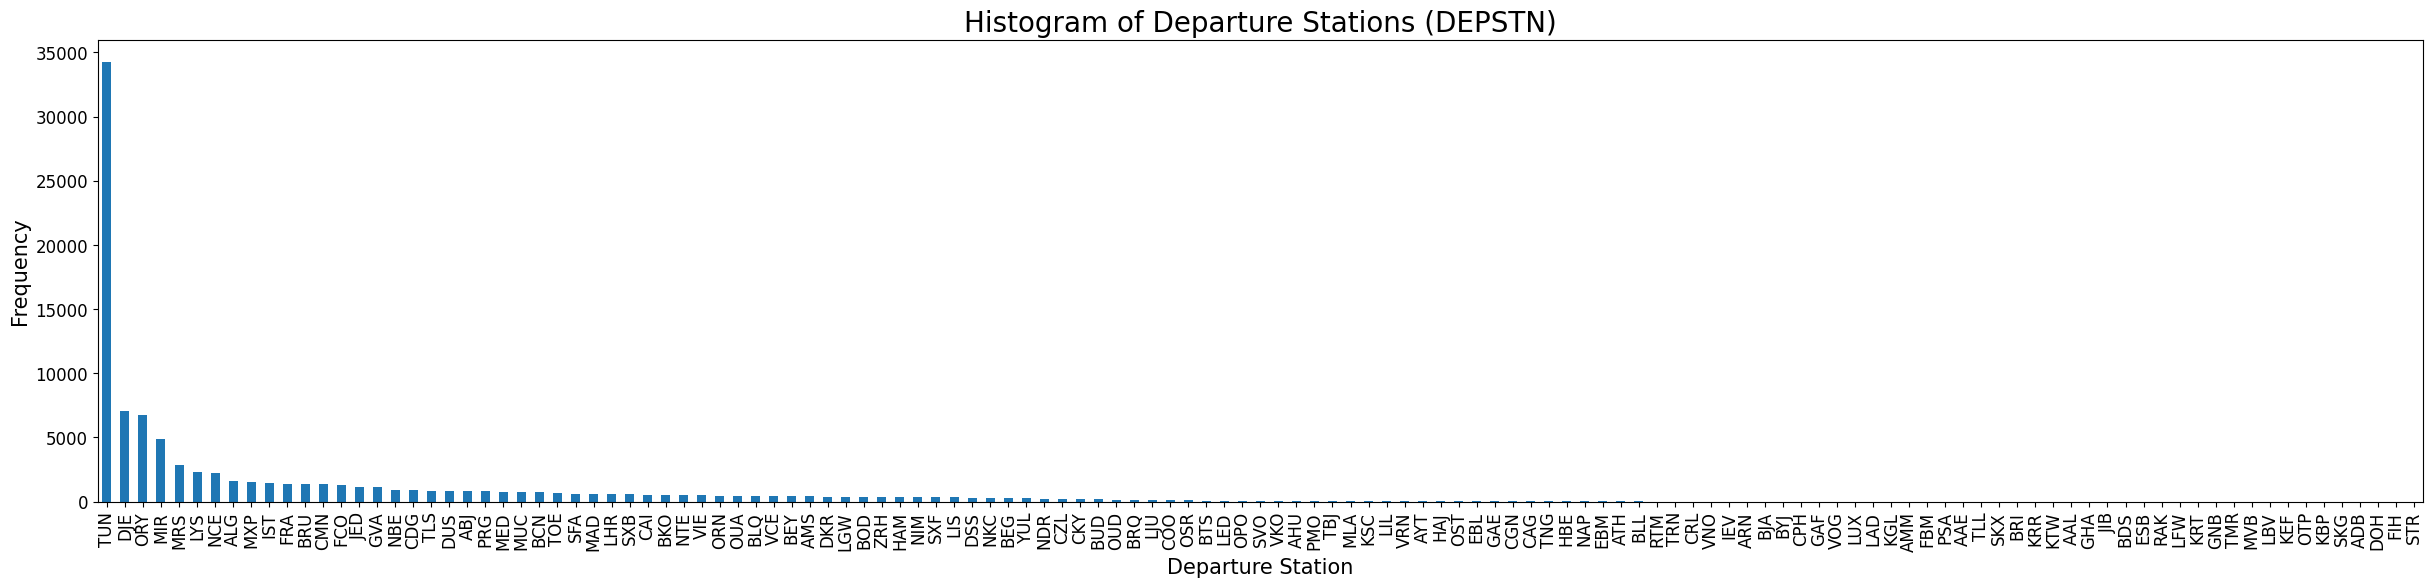

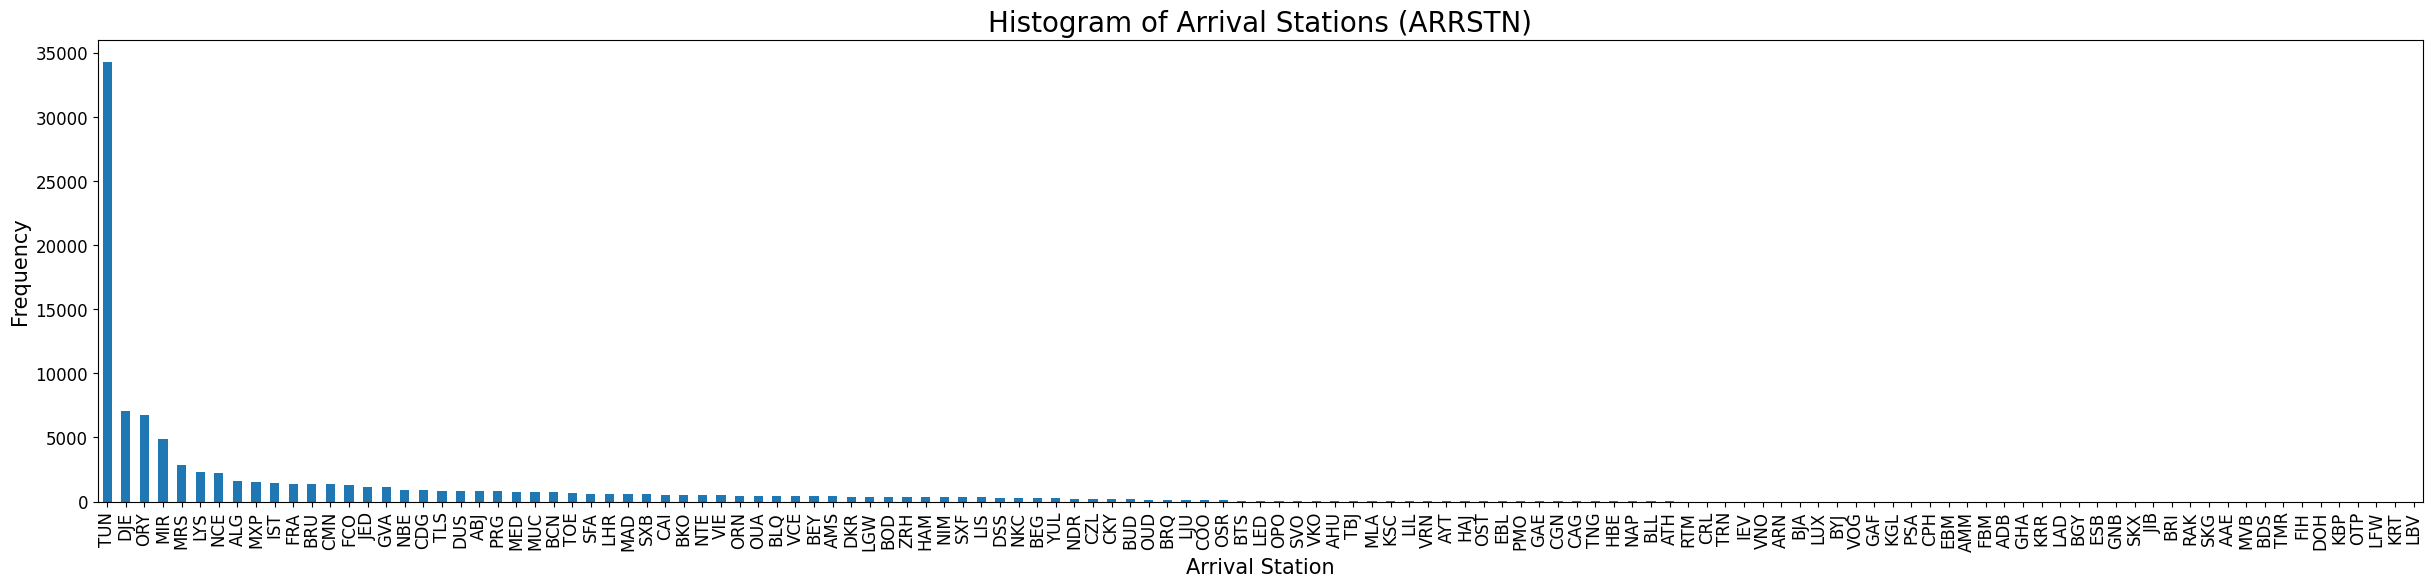

In [26]:
# Plot histogram for DEPSTN
plt.figure(figsize=(30, 6))
df['depstn'].value_counts().plot(kind='bar')
plt.title('Histogram of Departure Stations (DEPSTN)', fontsize=20)
plt.xlabel('Departure Station', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot histogram for ARRSTN
plt.figure(figsize=(30, 6))
df['arrstn'].value_counts().plot(kind='bar')
plt.title('Histogram of Arrival Stations (ARRSTN)', fontsize=20)
plt.xlabel('Arrival Station', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [27]:
# Calculate the frequency of each departure station
depstn_freq = df['depstn'].value_counts()

# List of DEPSTN ordered by most frequent (top 30)
depstn_freq_top30 = depstn_freq.head(30)
print("Top 30 Departure Stations by Frequency:")
print(depstn_freq_top30)

Top 30 Departure Stations by Frequency:
depstn
TUN    34283
DJE     7033
ORY     6726
MIR     4879
MRS     2834
LYS     2334
NCE     2221
ALG     1570
MXP     1531
IST     1437
FRA     1369
BRU     1368
CMN     1345
FCO     1265
JED     1136
GVA     1106
NBE      911
CDG      888
TLS      850
DUS      826
ABJ      813
PRG      793
MED      783
MUC      745
BCN      721
TOE      670
SFA      627
MAD      578
LHR      578
SXB      569
Name: count, dtype: int64


In [28]:
# List of DEPSTN ordered by least frequent (bottom 50)
depstn_freq_bottom50 = depstn_freq.tail(50)
print("Bottom 50 Departure Stations by Frequency:")
print(depstn_freq_bottom50)

Bottom 50 Departure Stations by Frequency:
depstn
CAG    13
TNG    11
HBE    10
NAP    10
EBM     9
ATH     9
BLL     8
RTM     7
TRN     6
CRL     6
VNO     5
IEV     4
ARN     4
BJA     3
BYJ     3
CPH     2
GAF     2
VOG     2
LUX     2
LAD     2
KGL     2
AMM     2
FBM     2
PSA     2
AAE     1
TLL     1
SKX     1
BRI     1
KRR     1
KTW     1
AAL     1
GHA     1
JIB     1
BDS     1
ESB     1
RAK     1
LFW     1
KRT     1
GNB     1
TMR     1
MVB     1
LBV     1
KEF     1
OTP     1
KBP     1
SKG     1
ADB     1
DOH     1
FIH     1
STR     1
Name: count, dtype: int64


In [29]:
# Calculate the frequency of each departure station
arrstn_freq = df['arrstn'].value_counts()

# List of ARRSTN ordered by most frequent (top 30)
arrstn_freq_top20 = arrstn_freq.head(30)
print("\nTop 20 Arrival Stations by Frequency:")
print(arrstn_freq_top20)


Top 20 Arrival Stations by Frequency:
arrstn
TUN    34310
DJE     7058
ORY     6726
MIR     4878
MRS     2834
LYS     2336
NCE     2222
ALG     1570
MXP     1531
IST     1437
FRA     1369
BRU     1366
CMN     1345
FCO     1266
JED     1140
GVA     1106
NBE      907
CDG      887
TLS      850
DUS      826
ABJ      813
PRG      794
MED      783
MUC      745
BCN      721
TOE      671
SFA      619
LHR      578
MAD      578
SXB      569
Name: count, dtype: int64


In [30]:
# List of arrstn ordered by least frequent (bottom 50)
depstn_freq_bottom50 = arrstn_freq.tail(50)
print("Bottom 50 Departure Stations by Frequency:")
print(depstn_freq_bottom50)

Bottom 50 Departure Stations by Frequency:
arrstn
EBL    17
PMO    17
GAE    15
CGN    13
CAG    13
TNG    11
HBE    10
NAP    10
BLL     8
ATH     8
RTM     7
CRL     6
TRN     6
IEV     5
VNO     5
ARN     4
BJA     3
LUX     2
BYJ     2
VOG     2
GAF     2
KGL     2
PSA     2
CPH     2
EBM     2
AMM     2
FBM     2
ADB     1
GHA     1
KRR     1
LAD     1
BGY     1
ESB     1
GNB     1
SKX     1
JIB     1
BRI     1
RAK     1
SKG     1
AAE     1
MVB     1
BDS     1
TMR     1
FIH     1
DOH     1
KBP     1
OTP     1
LFW     1
KRT     1
LBV     1
Name: count, dtype: int64


## The data is rightly skewed. Generate "other" category on Stations with <=10 flights. (OR, for feature engineering: Top-N encoding keeps most frequent categories and groups the rest into "other" category.)

In [31]:
# Create a copy of df to modify
df_updated = df.copy()

# Change stations in 'depstn' to 'other' if frequency is <= 10
depstn_freq = df_updated['depstn'].value_counts()
df_updated['depstn'] = df_updated['depstn'].apply(lambda x: 'other' if depstn_freq[x] <= 10 else x)

# Change stations in 'arrstn' to 'other' if frequency is <= 10
arrstn_freq = df_updated['arrstn'].value_counts()
df_updated['arrstn'] = df_updated['arrstn'].apply(lambda x: 'other' if arrstn_freq[x] <= 10 else x)

In [32]:
df_updated['depstn'].nunique()

82

In [33]:
df_updated['arrstn'].nunique()

82

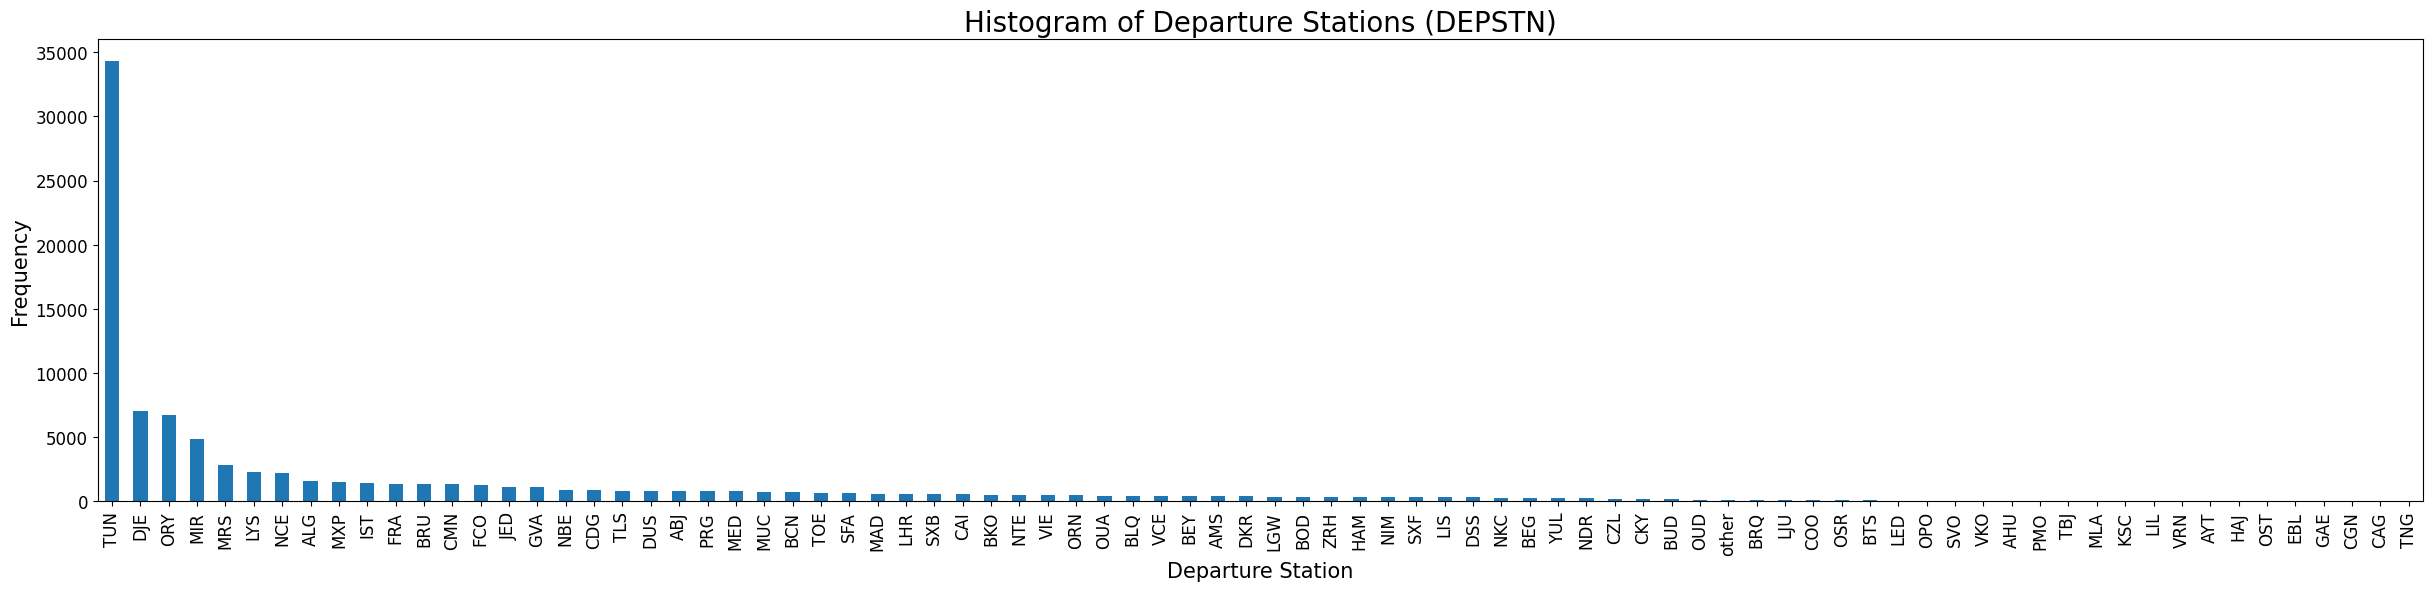

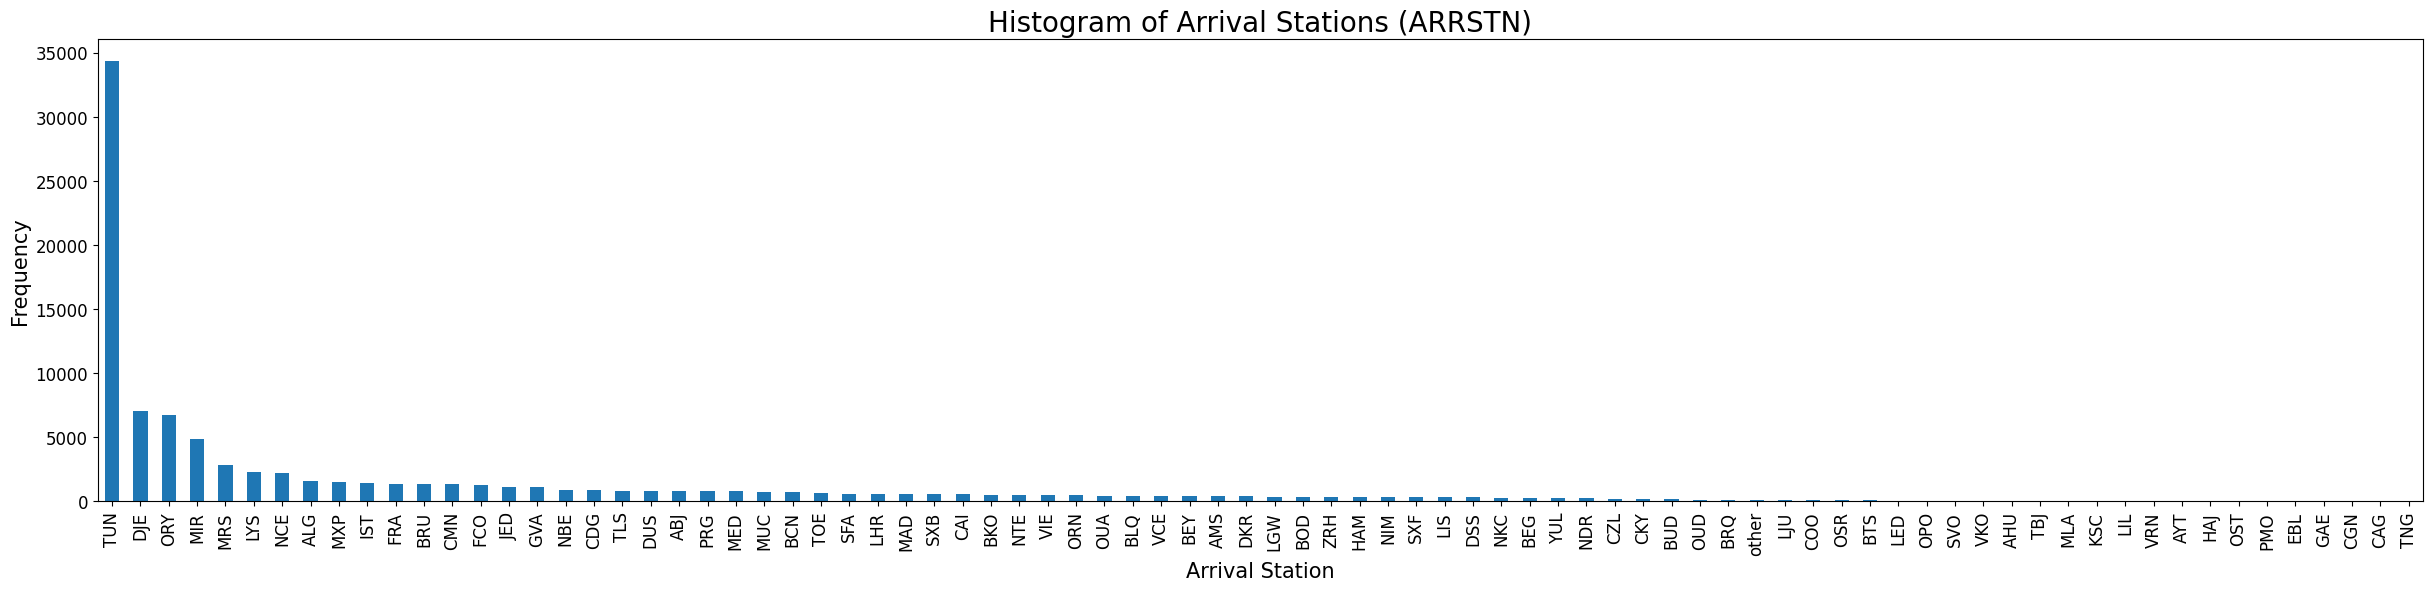

In [34]:
# Analysis of distribution of data frame after creating category 'other'
# Plot histogram for DEPSTN
plt.figure(figsize=(30, 6))
df_updated['depstn'].value_counts().plot(kind='bar')
plt.title('Histogram of Departure Stations (DEPSTN)', fontsize=20)
plt.xlabel('Departure Station', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot histogram for ARRSTN
plt.figure(figsize=(30, 6))
df_updated['arrstn'].value_counts().plot(kind='bar')
plt.title('Histogram of Arrival Stations (ARRSTN)', fontsize=20)
plt.xlabel('Arrival Station', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Analysis of Delay time by Departure and Arrival Station

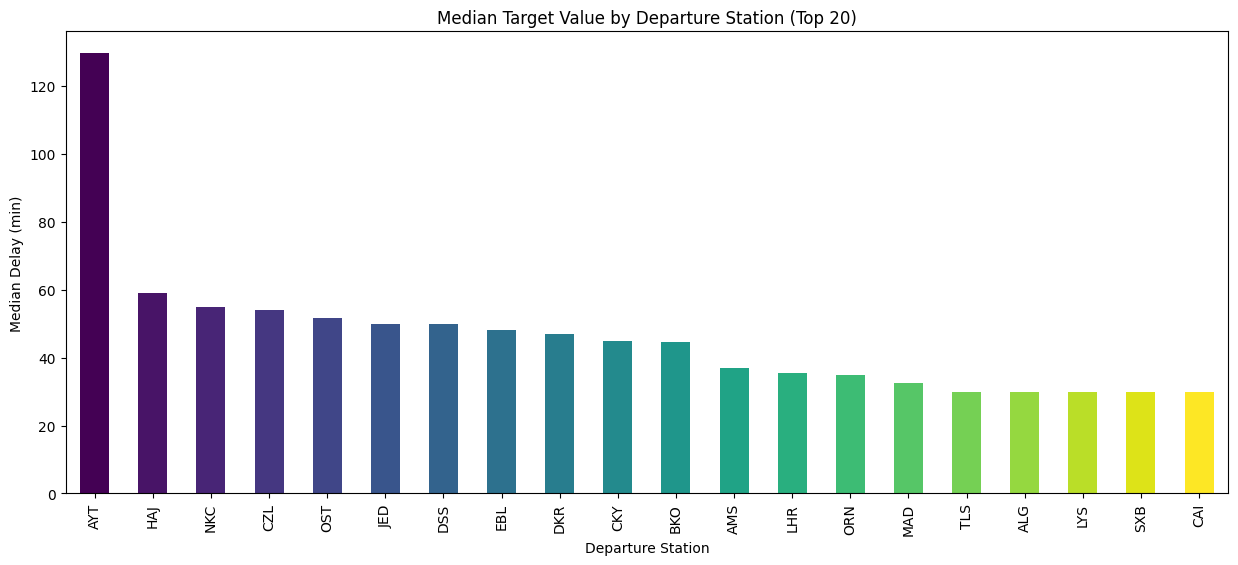

In [35]:
# Calculate the median of the target variable for each departure station and sort by median value
depstn_target_median_top20 = df_updated.groupby('depstn')['target'].median().sort_values(ascending=False).head(20)

# Plot the bar chart with wider x-axis and gradient colors
plt.figure(figsize=(15, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(depstn_target_median_top20)))
depstn_target_median_top20.plot(kind='bar', color=colors)
plt.title('Median Target Value by Departure Station (Top 20)')
plt.xlabel('Departure Station')
plt.ylabel('Median Delay (min)')
plt.xticks(rotation=90)
plt.show()

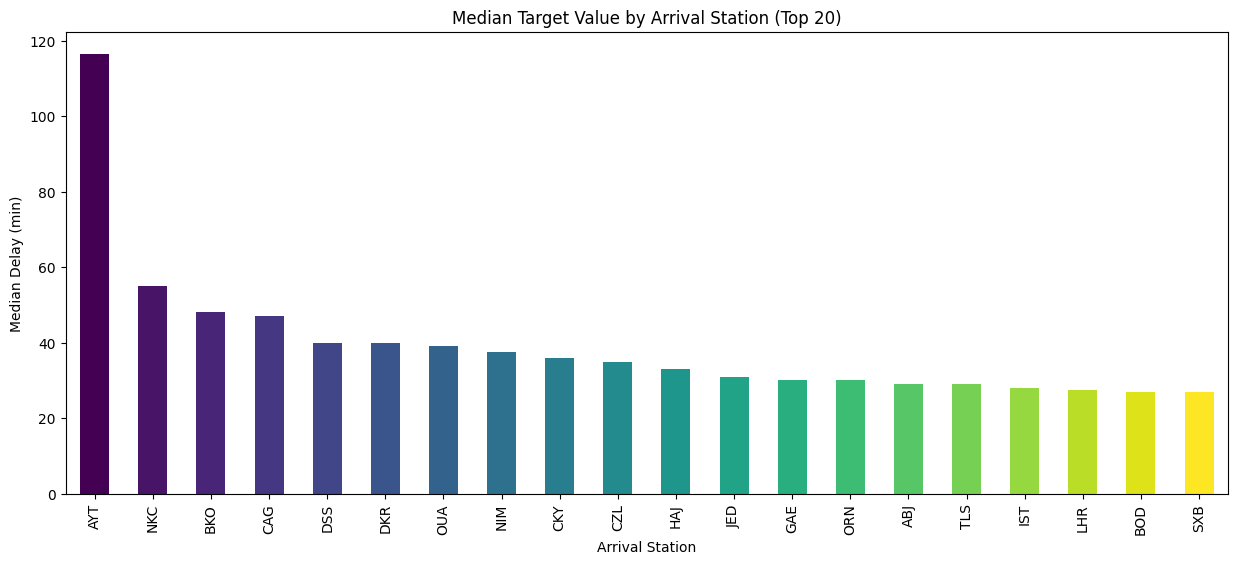

In [36]:
# Calculate the median of the target variable for each arrival station and sort by median value
arrstn_target_median_top20 = df_updated.groupby('arrstn')['target'].median().sort_values(ascending=False).head(20)

# Plot the bar chart with wider x-axis and gradient colors
plt.figure(figsize=(15, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(arrstn_target_median_top20)))
arrstn_target_median_top20.plot(kind='bar', color=colors)
plt.title('Median Target Value by Arrival Station (Top 20)')
plt.xlabel('Arrival Station')
plt.ylabel('Median Delay (min)')
plt.xticks(rotation=90)
plt.show()

### Make new category based on airport size

In [37]:
depstn_freq = df['depstn'].value_counts()

# Create a new column 'depstn_size' based on the frequency count of 'depstn'
df['depstn_size'] = df['depstn'].apply(lambda x: 'very large' if depstn_freq[x] > 5000 else 
                                       ('large' if depstn_freq[x] >= 2000 else 
                                        ('medium' if depstn_freq[x] >= 1000 else 'small')))
                                    

In [38]:
arrstn_freq = df['arrstn'].value_counts()

# Create a new column 'arrstn_size' based on the frequency count of 'arrstn'
df['arrstn_size'] = df['arrstn'].apply(lambda x: 'very large' if arrstn_freq[x] > 5000 else 
                                       ('large' if arrstn_freq[x] >= 2000 else 
                                        ('medium' if arrstn_freq[x] >= 1000 else 'small')))

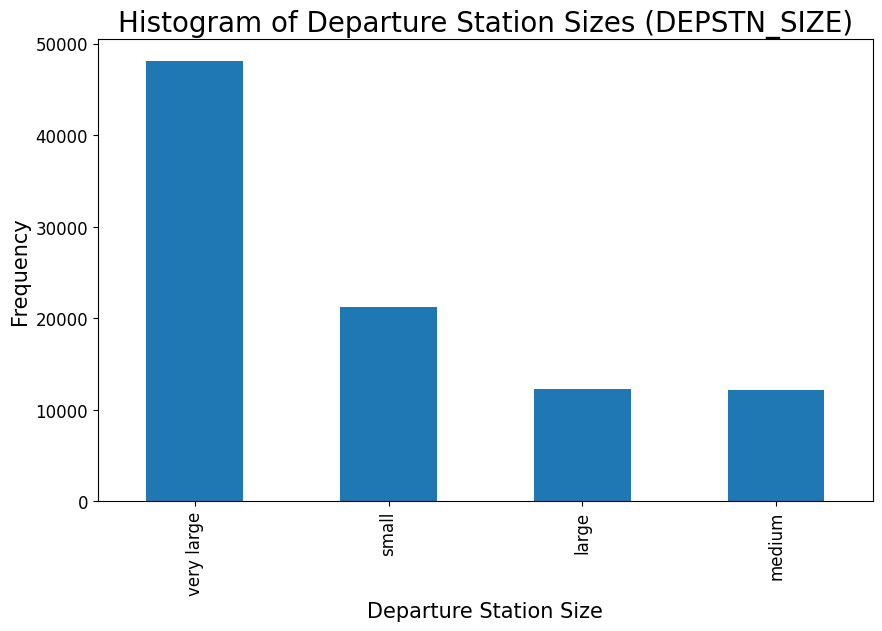

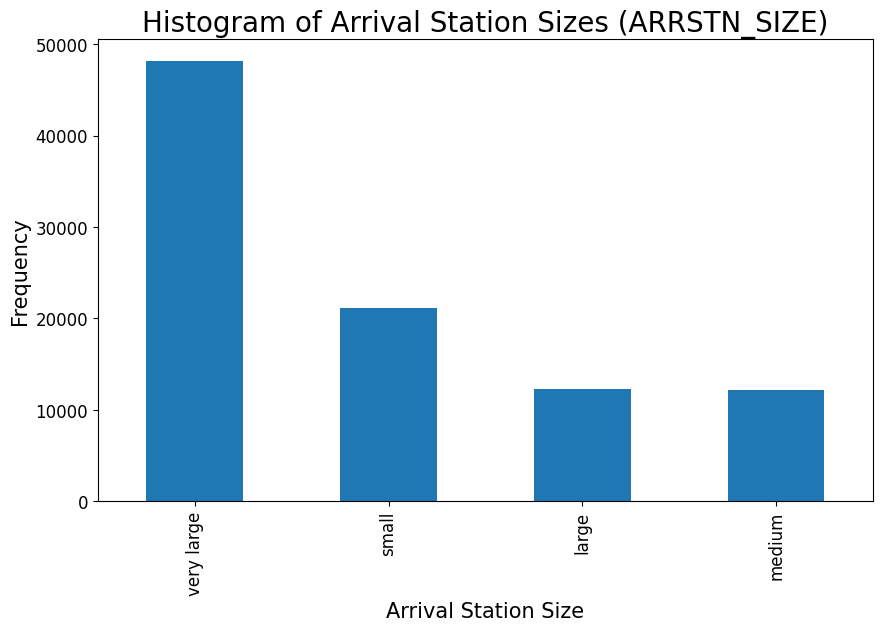

In [39]:
# Plot histogram for DEPSTN_SIZE
plt.figure(figsize=(10, 6))
df['depstn_size'].value_counts().plot(kind='bar')
plt.title('Histogram of Departure Station Sizes (DEPSTN_SIZE)', fontsize=20)
plt.xlabel('Departure Station Size', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot histogram for ARRSTN_SIZE
plt.figure(figsize=(10, 6))
df['arrstn_size'].value_counts().plot(kind='bar')
plt.title('Histogram of Arrival Station Sizes (ARRSTN_SIZE)', fontsize=20)
plt.xlabel('Arrival Station Size', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

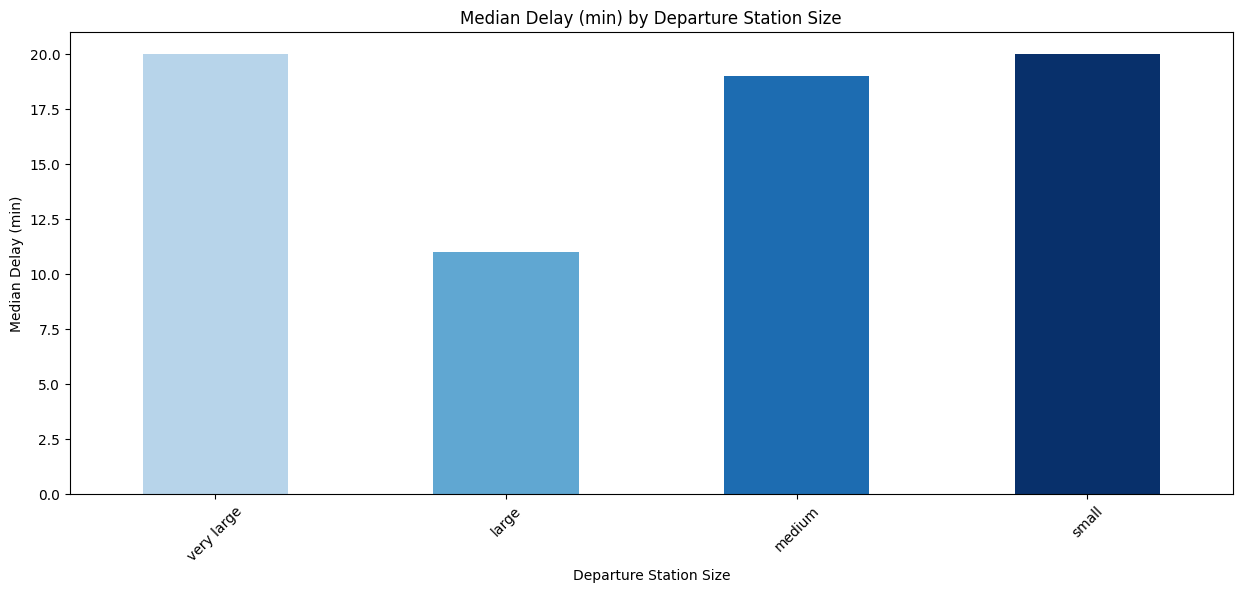

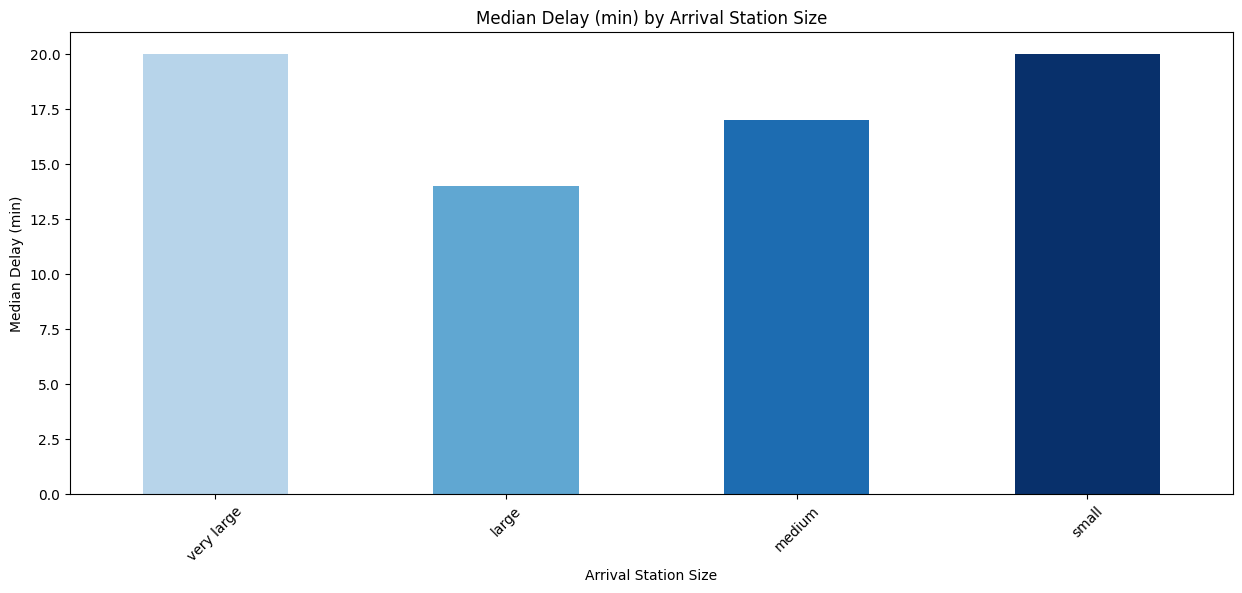

In [40]:
# Calculate the median delay by departure station size
median_delay_by_depstn_size = df.groupby('depstn_size')['target'].median()

# Define the custom order
custom_order = ['very large', 'large', 'medium', 'small']

# Sort median_delay_by_depstn_size
median_delay_by_depstn_size = median_delay_by_depstn_size.reindex(custom_order)

# Plot the bar chart for depstn_size
plt.figure(figsize=(15, 6))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(median_delay_by_depstn_size)))  # Adjusted color range
median_delay_by_depstn_size.plot(kind='bar', color=colors)
plt.title('Median Delay (min) by Departure Station Size')
plt.xlabel('Departure Station Size')
plt.ylabel('Median Delay (min)')
plt.xticks(rotation=45)
plt.show()

# Calculate the median delay by arrival station size
median_delay_by_arrstn_size = df.groupby('arrstn_size')['target'].median()

# Sort median_delay_by_arrstn_size
median_delay_by_arrstn_size = median_delay_by_arrstn_size.reindex(custom_order)

# Plot the bar chart for arrstn_size
plt.figure(figsize=(15, 6))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(median_delay_by_arrstn_size)))  # Adjusted color range
median_delay_by_arrstn_size.plot(kind='bar', color=colors)
plt.title('Median Delay (min) by Arrival Station Size')
plt.xlabel('Arrival Station Size')
plt.ylabel('Median Delay (min)')
plt.xticks(rotation=45)
plt.show()

## Analysis of new features

In [41]:
df.head()

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target,...,continent_arr,iso_country_arr,elevation_ft_arr,type_arr,is_same_continent,is_same_country,time_day_std,time_day_sta,depstn_size,arrstn_size
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,10:30:00,12:55:00,ATA,TU 32AIMN,260.0,...,AF,TN,22.0,large_airport,1.0,0.0,morning,midday,medium,very large
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,15:05:00,16:55:00,ATA,TU 31BIMO,20.0,...,AF,TN,22.0,large_airport,0.0,0.0,afternoon,afternoon,medium,very large
2,train_id_2,2016-01-16,TU 0214,TUN,IST,04:10:00,06:45:00,ATA,TU 32AIMN,0.0,...,EU,TR,325.0,large_airport,0.0,0.0,night,morning,very large,medium
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,14:10:00,17:00:00,ATA,TU 736IOK,0.0,...,EU,FR,90.0,medium_airport,0.0,0.0,afternoon,evening,very large,small
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,14:30:00,15:50:00,ATA,TU 320IMU,22.0,...,AF,DZ,82.0,large_airport,1.0,0.0,afternoon,afternoon,very large,medium


In [42]:
df.describe()

,target,elevation_ft_dep,elevation_ft_arr,is_same_continent,is_same_country
count,93679.000000,90792.000000,90787.000000,93679.000000,93679.000000
mean,55.655099,213.076108,212.983269,0.217797,0.071521
std,123.262956,371.662758,371.640038,0.412751,0.257694
min,0.000000,-15.000000,-15.000000,0.000000,0.000000
25%,0.000000,22.000000,22.000000,0.000000,0.000000
50%,19.000000,22.000000,22.000000,0.000000,0.000000
75%,50.000000,291.000000,291.000000,0.000000,0.000000
max,3451.000000,4859.000000,4859.000000,1.000000,1.000000


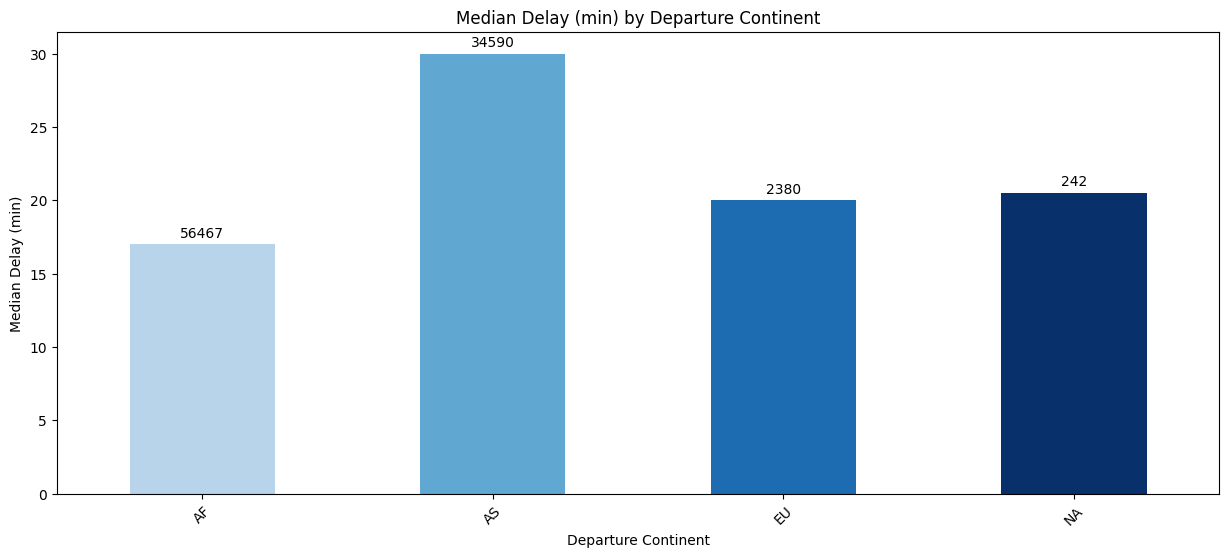

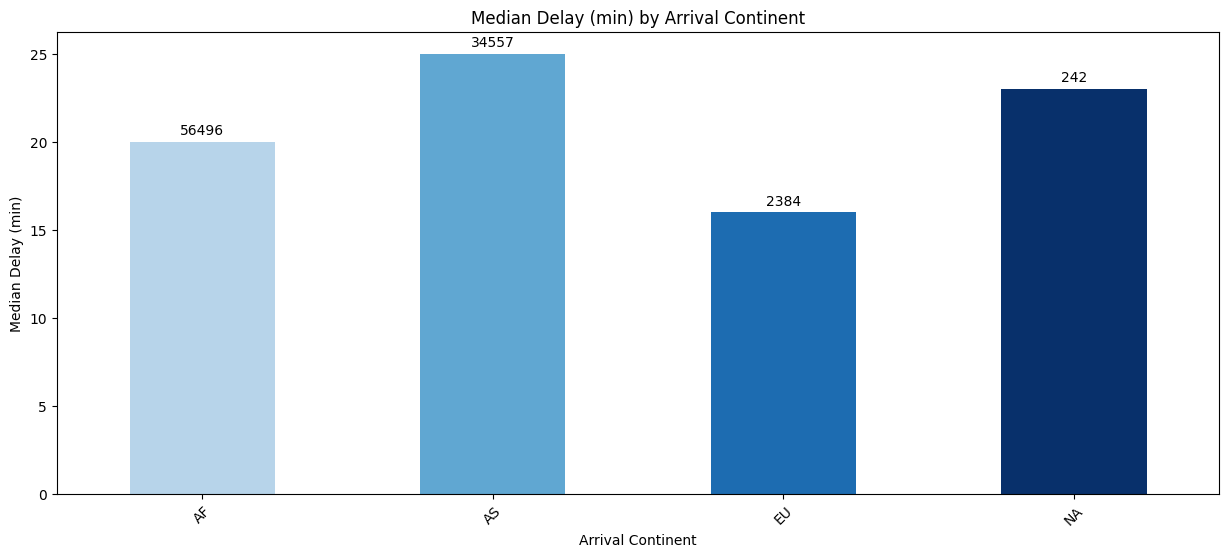

In [43]:
## target against continent_dep
# Calculate the median delay by departure continent
median_delay_by_continent_dep = df.groupby('continent_dep')['target'].median()
count_by_continent_dep = df['continent_dep'].value_counts()

# Plot the bar chart for continent_dep
plt.figure(figsize=(15, 6))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(median_delay_by_continent_dep)))  # Adjusted color range
ax = median_delay_by_continent_dep.plot(kind='bar', color=colors)
plt.title('Median Delay (min) by Departure Continent')
plt.xlabel('Departure Continent')
plt.ylabel('Median Delay (min)')
plt.xticks(rotation=45)

# Annotate the bars with the count of values
for i, (median, count) in enumerate(zip(median_delay_by_continent_dep, count_by_continent_dep)):
    ax.annotate(f'{count}', xy=(i, median), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()

# Calculate the median delay by arrival continent
median_delay_by_continent_arr = df.groupby('continent_arr')['target'].median()
count_by_continent_arr = df['continent_arr'].value_counts()

# Plot the bar chart for continent_arr
plt.figure(figsize=(15, 6))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(median_delay_by_continent_arr)))  # Adjusted color range
ax = median_delay_by_continent_arr.plot(kind='bar', color=colors)
plt.title('Median Delay (min) by Arrival Continent')
plt.xlabel('Arrival Continent')
plt.ylabel('Median Delay (min)')
plt.xticks(rotation=45)

# Annotate the bars with the count of values
for i, (median, count) in enumerate(zip(median_delay_by_continent_arr, count_by_continent_arr)):
    ax.annotate(f'{count}', xy=(i, median), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()

In [44]:
# Find IATA codes for rows where continent_dep or continent_arr is 'NA'
iata_codes_na_dep = df[df['continent_dep'] == 'NA']['depstn'].unique()
iata_codes_na_arr = df[df['continent_arr'] == 'NA']['arrstn'].unique()

print("IATA codes for 'NA' in continent_dep:", iata_codes_na_dep)
print("IATA codes for 'NA' in continent_arr:", iata_codes_na_arr)

IATA codes for 'NA' in continent_dep: ['YUL']
IATA codes for 'NA' in continent_arr: ['YUL']


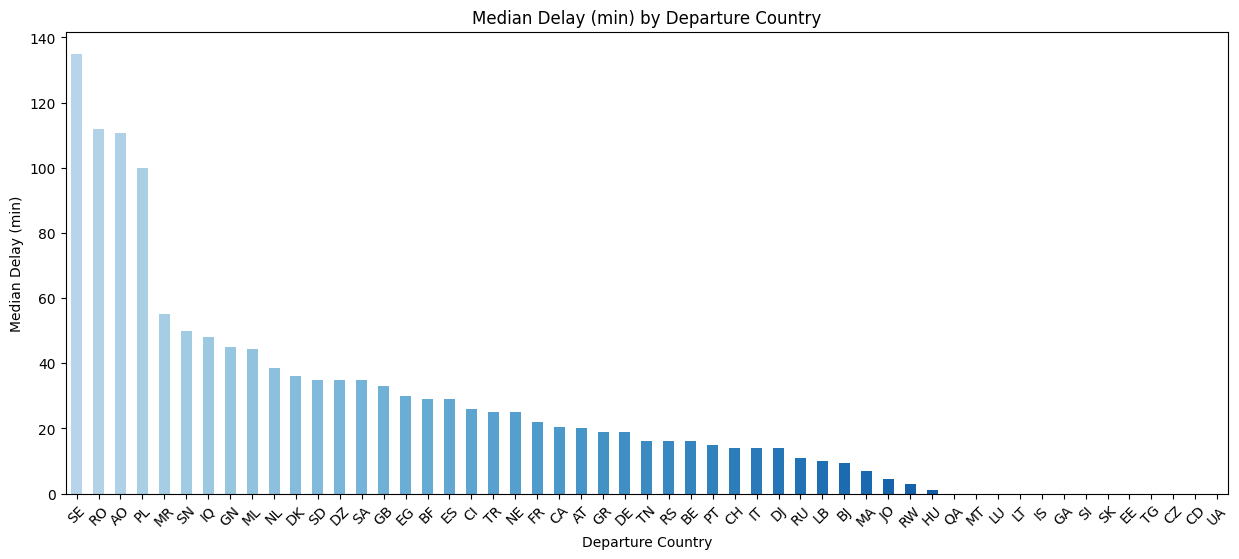

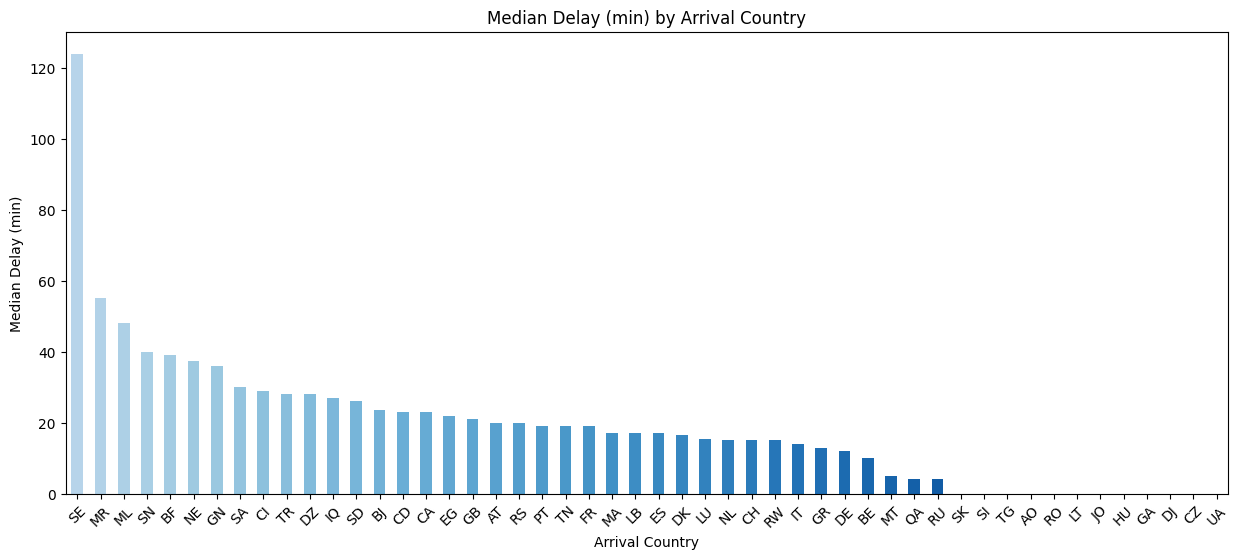

In [45]:
## target against iso_country_dep and iso_country_arr

# Calculate the median delay by departure country
median_delay_by_country_dep = df.groupby('iso_country_dep')['target'].median().sort_values(ascending=False)

# Plot the bar chart for iso_country_dep
plt.figure(figsize=(15, 6))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(median_delay_by_country_dep)))  # Adjusted color range
median_delay_by_country_dep.plot(kind='bar', color=colors)
plt.title('Median Delay (min) by Departure Country')
plt.xlabel('Departure Country')
plt.ylabel('Median Delay (min)')
plt.xticks(rotation=45)
plt.show()

# Calculate the median delay by arrival country
median_delay_by_country_arr = df.groupby('iso_country_arr')['target'].median().sort_values(ascending=False)

# Plot the bar chart for iso_country_arr
plt.figure(figsize=(15, 6))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(median_delay_by_country_arr)))  # Adjusted color range
median_delay_by_country_arr.plot(kind='bar', color=colors)
plt.title('Median Delay (min) by Arrival Country')
plt.xlabel('Arrival Country')
plt.ylabel('Median Delay (min)')
plt.xticks(rotation=45)
plt.show()


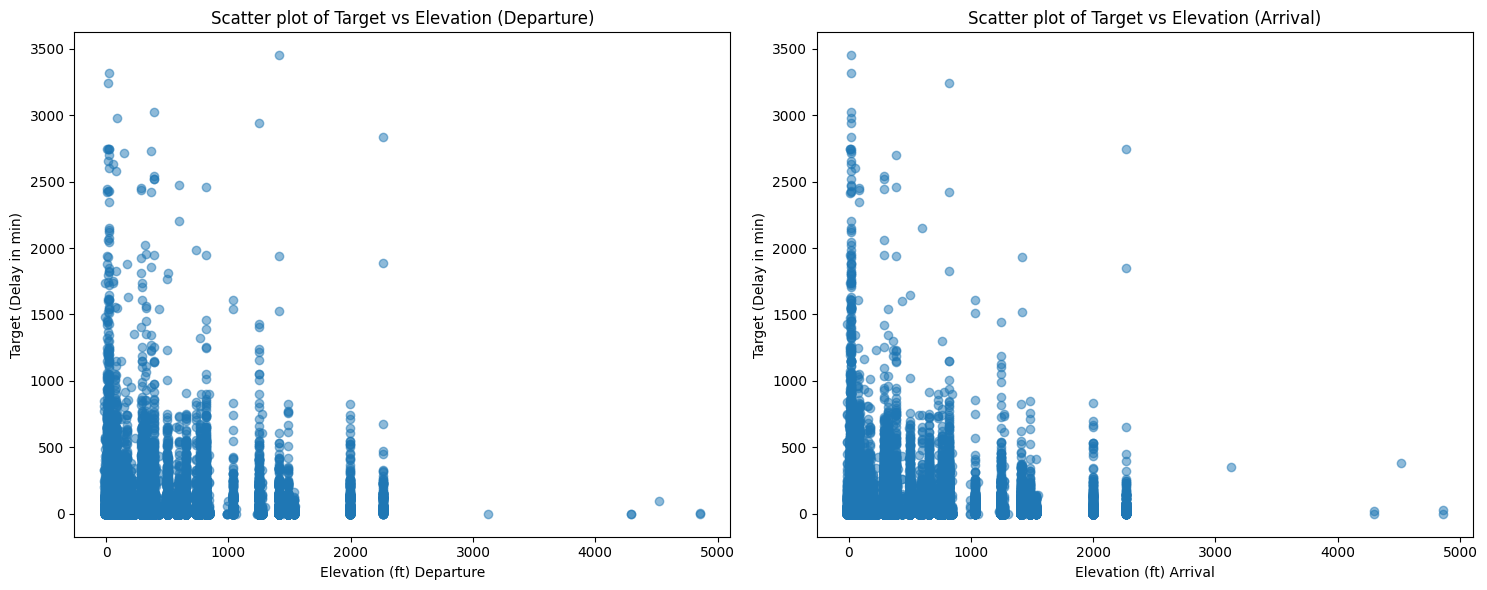

In [46]:
# Scatter plot of target against elevation_ft_dep and elevation_ft_arr
plt.figure(figsize=(15, 6))

# Scatter plot for elevation_ft_dep
plt.subplot(1, 2, 1)
plt.scatter(df['elevation_ft_dep'], df['target'], alpha=0.5)
plt.title('Scatter plot of Target vs Elevation (Departure)')
plt.xlabel('Elevation (ft) Departure')
plt.ylabel('Target (Delay in min)')

# Scatter plot for elevation_ft_arr
plt.subplot(1, 2, 2)
plt.scatter(df['elevation_ft_arr'], df['target'], alpha=0.5)
plt.title('Scatter plot of Target vs Elevation (Arrival)')
plt.xlabel('Elevation (ft) Arrival')
plt.ylabel('Target (Delay in min)')

plt.tight_layout()
plt.show()

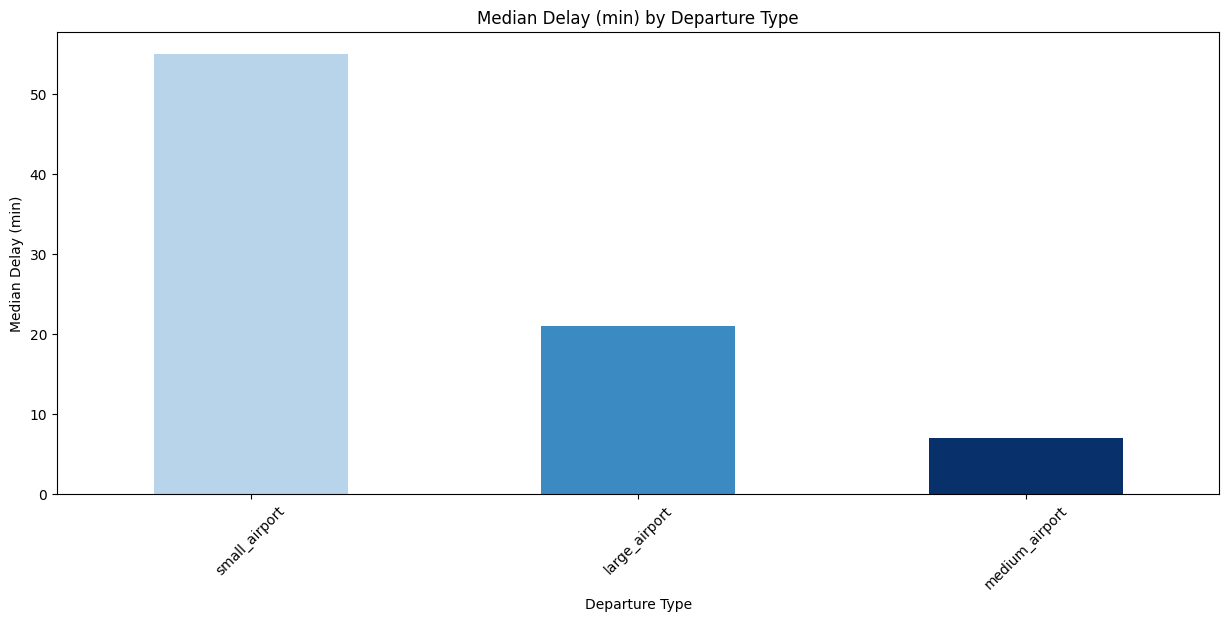

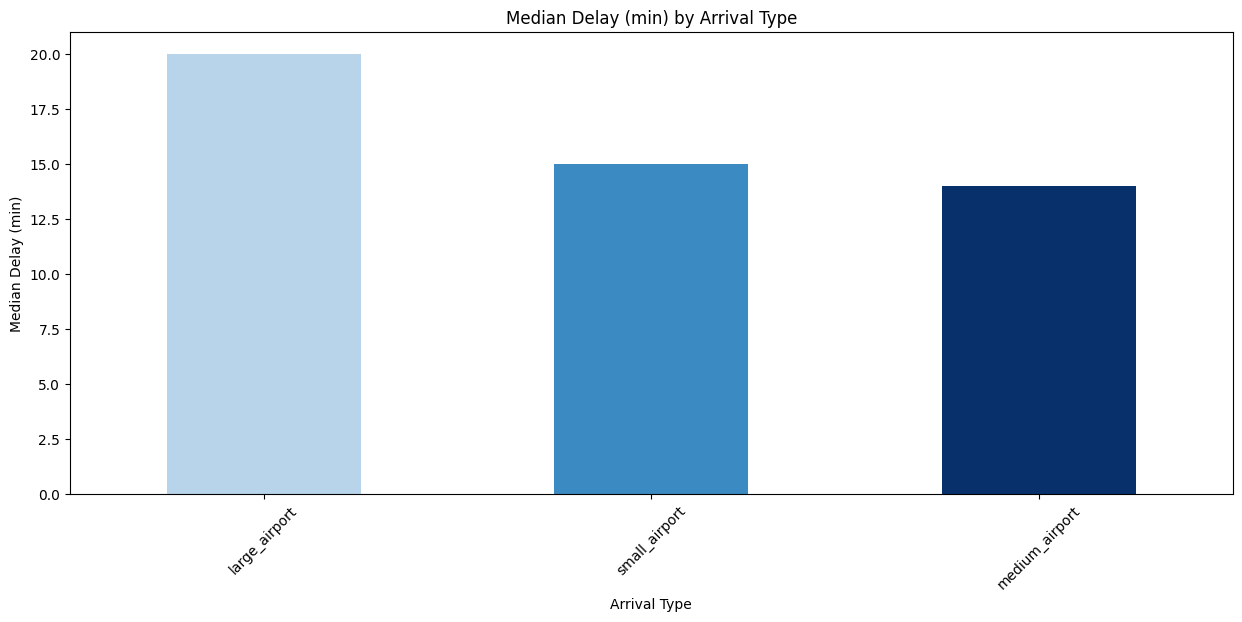

In [47]:
## target against type_dep and type_arr
# Calculate the median delay by departure type
median_delay_by_type_dep = df.groupby('type_dep')['target'].median().sort_values(ascending=False)

# Plot the bar chart for type_dep
plt.figure(figsize=(15, 6))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(median_delay_by_type_dep)))  # Adjusted color range
median_delay_by_type_dep.plot(kind='bar', color=colors)
plt.title('Median Delay (min) by Departure Type')
plt.xlabel('Departure Type')
plt.ylabel('Median Delay (min)')
plt.xticks(rotation=45)
plt.show()

# Calculate the median delay by arrival type
median_delay_by_type_arr = df.groupby('type_arr')['target'].median().sort_values(ascending=False)

# Plot the bar chart for type_arr
plt.figure(figsize=(15, 6))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(median_delay_by_type_arr)))  # Adjusted color range
median_delay_by_type_arr.plot(kind='bar', color=colors)
plt.title('Median Delay (min) by Arrival Type')
plt.xlabel('Arrival Type')
plt.ylabel('Median Delay (min)')
plt.xticks(rotation=45)
plt.show()

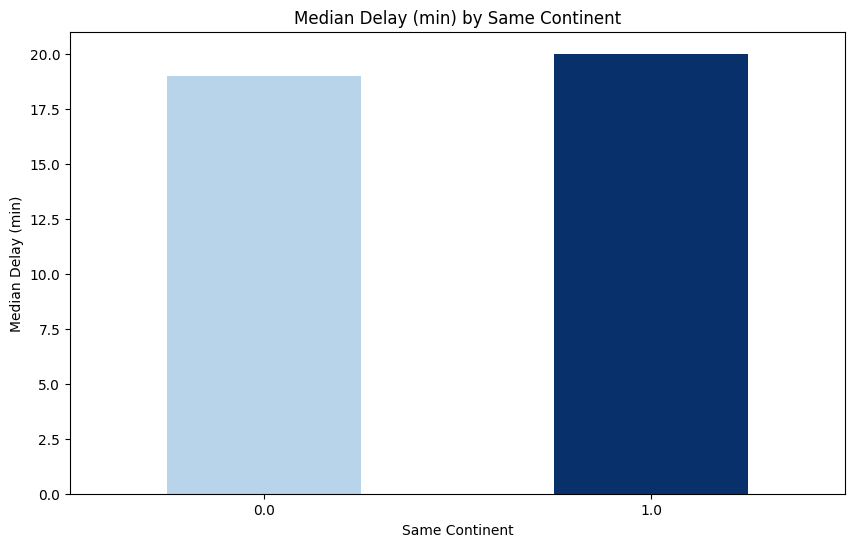

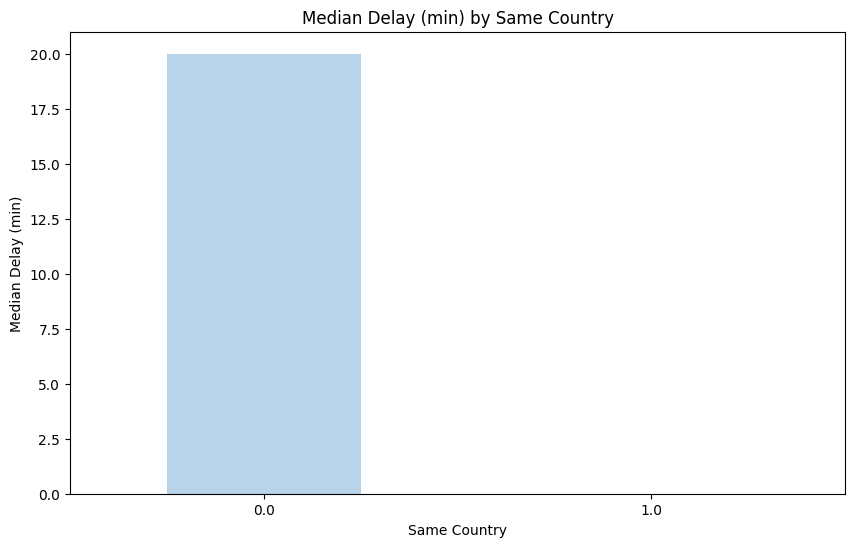

In [48]:
# target against is_same_continent and is_same_country
# Calculate the median delay by is_same_continent
median_delay_by_same_continent = df.groupby('is_same_continent')['target'].median()

# Plot the bar chart for is_same_continent
plt.figure(figsize=(10, 6))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(median_delay_by_same_continent)))  # Adjusted color range
median_delay_by_same_continent.plot(kind='bar', color=colors)
plt.title('Median Delay (min) by Same Continent')
plt.xlabel('Same Continent')
plt.ylabel('Median Delay (min)')
plt.xticks(rotation=0)
plt.show()

# Calculate the median delay by is_same_country
median_delay_by_same_country = df.groupby('is_same_country')['target'].median()

# Plot the bar chart for is_same_country
plt.figure(figsize=(10, 6))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(median_delay_by_same_country)))  # Adjusted color range
median_delay_by_same_country.plot(kind='bar', color=colors)
plt.title('Median Delay (min) by Same Country')
plt.xlabel('Same Country')
plt.ylabel('Median Delay (min)')
plt.xticks(rotation=0)
plt.show()

In [49]:
df.head()

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target,...,continent_arr,iso_country_arr,elevation_ft_arr,type_arr,is_same_continent,is_same_country,time_day_std,time_day_sta,depstn_size,arrstn_size
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,10:30:00,12:55:00,ATA,TU 32AIMN,260.0,...,AF,TN,22.0,large_airport,1.0,0.0,morning,midday,medium,very large
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,15:05:00,16:55:00,ATA,TU 31BIMO,20.0,...,AF,TN,22.0,large_airport,0.0,0.0,afternoon,afternoon,medium,very large
2,train_id_2,2016-01-16,TU 0214,TUN,IST,04:10:00,06:45:00,ATA,TU 32AIMN,0.0,...,EU,TR,325.0,large_airport,0.0,0.0,night,morning,very large,medium
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,14:10:00,17:00:00,ATA,TU 736IOK,0.0,...,EU,FR,90.0,medium_airport,0.0,0.0,afternoon,evening,very large,small
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,14:30:00,15:50:00,ATA,TU 320IMU,22.0,...,AF,DZ,82.0,large_airport,1.0,0.0,afternoon,afternoon,very large,medium


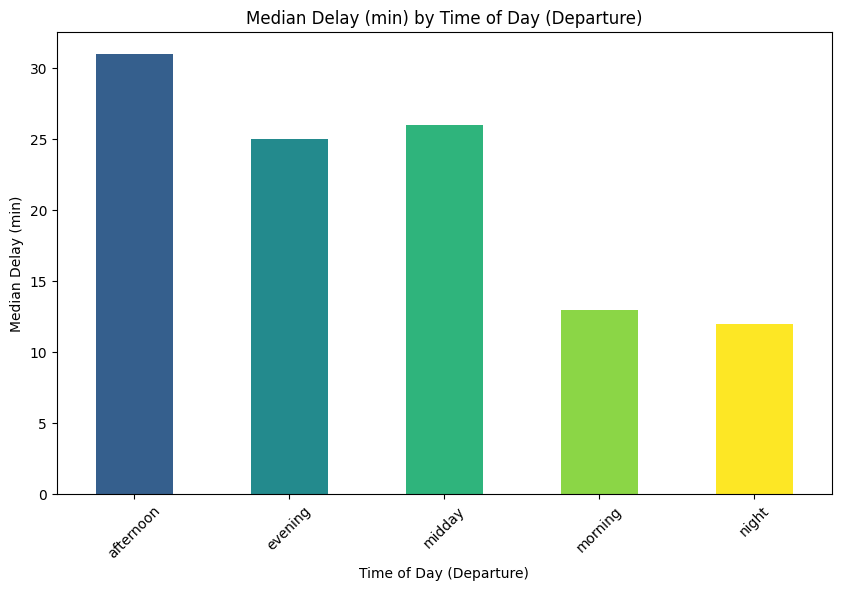

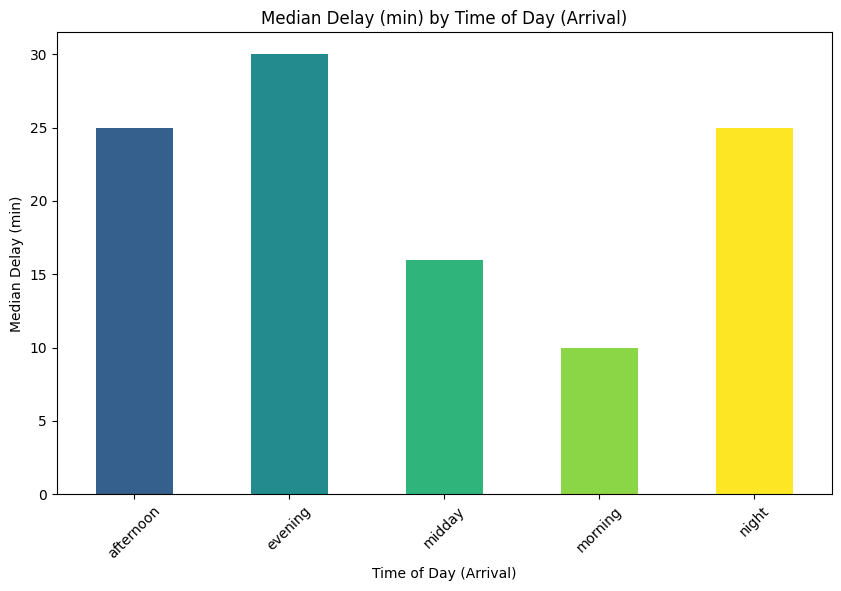

In [50]:
# Calculate the median delay for each time of day for departure
median_delay_by_time_day_std = df.groupby('time_day_std')['target'].median()

# Plot the bar chart for time_day_std
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0.3, 1, len(median_delay_by_time_day_std)))
median_delay_by_time_day_std.plot(kind='bar', color=colors)
plt.title('Median Delay (min) by Time of Day (Departure)')
plt.xlabel('Time of Day (Departure)')
plt.ylabel('Median Delay (min)')
plt.xticks(rotation=45)
plt.show()

# Calculate the median delay for each time of day for arrival
median_delay_by_time_day_sta = df.groupby('time_day_sta')['target'].median()

# Plot the bar chart for time_day_sta
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0.3, 1, len(median_delay_by_time_day_sta)))
median_delay_by_time_day_sta.plot(kind='bar', color=colors)
plt.title('Median Delay (min) by Time of Day (Arrival)')
plt.xlabel('Time of Day (Arrival)')
plt.ylabel('Median Delay (min)')
plt.xticks(rotation=45)
plt.show()

### interesting features would be (need to impute some rows, missing values):
- depstn_size?
- arrstn_size?
- iso_country_dep
- iso_country_arr
- is_same_country
- type_dep
- type_arr

arrival type or size? 
only use departure?

no continent because AS only has 26 entries and the others are similar

In [51]:
df.columns

Index(['id', 'datop', 'fltid', 'depstn', 'arrstn', 'std', 'sta', 'status',
       'ac', 'target', 'continent_dep', 'iso_country_dep', 'elevation_ft_dep',
       'type_dep', 'continent_arr', 'iso_country_arr', 'elevation_ft_arr',
       'type_arr', 'is_same_continent', 'is_same_country', 'time_day_std',
       'time_day_sta', 'depstn_size', 'arrstn_size'],
      dtype='object')

In [52]:
# Count for each category in the specified columns
columns_to_count = [
    # 'continent_dep', 
    # 'type_dep', 
    # 'continent_arr', 
    # 'type_arr', 
    # 'is_same_continent', 
    # 'is_same_country', 
    # 'depstn_size', 
    # 'arrstn_size',
    'type_dep',
    'type_arr'
]

for column in columns_to_count:
    print(f"Counts for {column}:")
    print(df[column].value_counts())
    print("\n")

Counts for type_dep:
type_dep
large_airport     74247
medium_airport    19431
small_airport         1
Name: count, dtype: int64


Counts for type_arr:
type_arr
large_airport     74245
medium_airport    19433
small_airport         1
Name: count, dtype: int64




### How hande missing values

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93679 entries, 0 to 107831
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 93679 non-null  object 
 1   datop              93679 non-null  object 
 2   fltid              93679 non-null  object 
 3   depstn             93679 non-null  object 
 4   arrstn             93679 non-null  object 
 5   std                93679 non-null  object 
 6   sta                93679 non-null  object 
 7   status             93679 non-null  object 
 8   ac                 93679 non-null  object 
 9   target             93679 non-null  float64
 10  continent_dep      93679 non-null  object 
 11  iso_country_dep    93679 non-null  object 
 12  elevation_ft_dep   90792 non-null  float64
 13  type_dep           93679 non-null  object 
 14  continent_arr      93679 non-null  object 
 15  iso_country_arr    93679 non-null  object 
 16  elevation_ft_arr   90787 n

In [54]:
# Find depstn with missing values in continent_dep, iso_country_dep, and type_dep
missing_depstn_continent = df[df['continent_dep'].isna()]['depstn'].unique()
missing_depstn_country = df[df['iso_country_dep'].isna()]['depstn'].unique()
missing_depstn_type = df[df['type_dep'].isna()]['depstn'].unique()

print("Departure stations with missing values:")
print("Missing continent_dep:", missing_depstn_continent)
print("Missing iso_country_dep:", missing_depstn_country)
print("Missing type_dep:", missing_depstn_type)

# Find arrstn with missing values in continent_arr, iso_country_arr, and type_arr
missing_arrstn_continent = df[df['continent_arr'].isna()]['arrstn'].unique()
missing_arrstn_country = df[df['iso_country_arr'].isna()]['arrstn'].unique()
missing_arrstn_type = df[df['type_arr'].isna()]['arrstn'].unique()

print("\nArrival stations with missing values:")
print("Missing continent_arr:", missing_arrstn_continent)
print("Missing iso_country_arr:", missing_arrstn_country)
print("Missing type_arr:", missing_arrstn_type)

Departure stations with missing values:
Missing continent_dep: []
Missing iso_country_dep: []
Missing type_dep: []

Arrival stations with missing values:
Missing continent_arr: []
Missing iso_country_arr: []
Missing type_arr: []


Missing Departure stations: AMM, BEY, DOH, EBL, IEV, JED, KBP, KRR, LED, MED, SKX, SVO, SXF, VKO, VOG, YUL
Missing Arrival Stations: AMM, BEY, DOH, EBL, IEV, JED, KBP, KRR, LED, MED, SKX, SVO, SXF, VKO, VOG, YUL



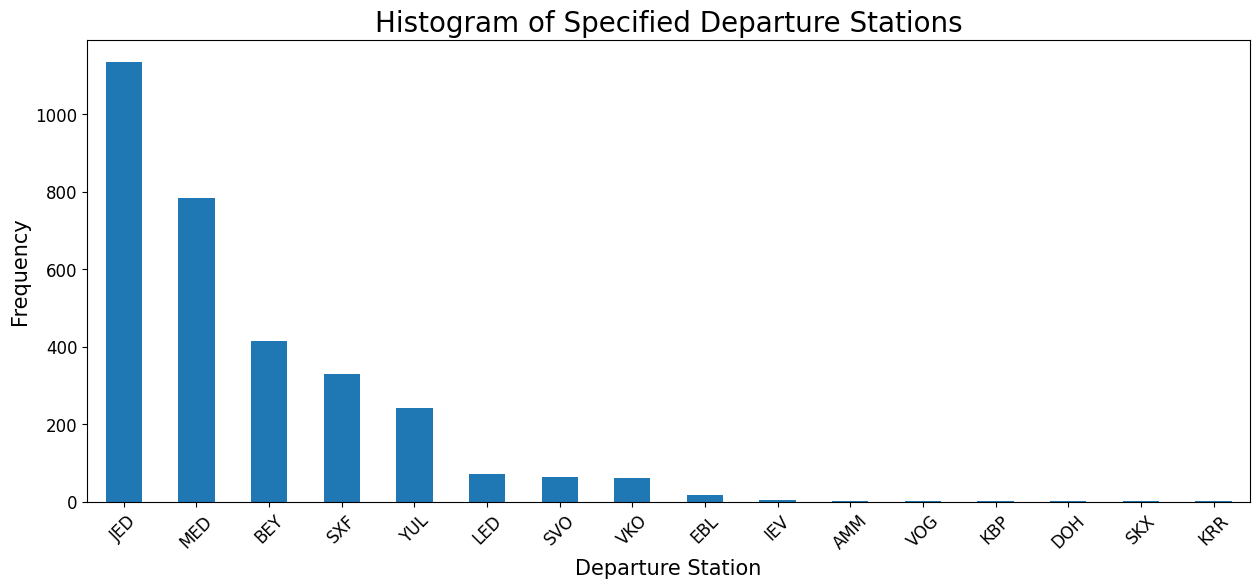

In [55]:
# List of departure stations to plot
departure_stations = ['AMM', 'BEY', 'DOH', 'EBL', 'IEV', 'JED', 'KBP', 'KRR', 'LED', 'MED', 'SKX', 'SVO', 'SXF', 'VKO', 'VOG', 'YUL']

# Filter the dataframe for the specified departure stations
filtered_df = df[df['depstn'].isin(departure_stations)]

# Plot histogram for the specified departure stations
plt.figure(figsize=(15, 6))
filtered_df['depstn'].value_counts().plot(kind='bar')
plt.title('Histogram of Specified Departure Stations', fontsize=20)
plt.xlabel('Departure Station', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()